In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
import math
boston_dataset = load_boston()

In [2]:
print(boston_dataset.feature_names)
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
X = boston.drop(labels=['MEDV'],axis=1)
y = boston['MEDV']

In [8]:
#sns.pairplot(boston, vars = ['LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'CRIM', 'NOX', 'RAD', 'AGE', 'MEDV'])

In [9]:
#sns.pairplot(boston, vars = ['RM', 'ZN', 'B', 'DIS', 'CHAS','MEDV'])

In [10]:
#X = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
#y = boston['MEDV']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle = True)

In [12]:
j=0
for i in range(1,11):
    X_train2=PolynomialFeatures(i).fit_transform(X_train)
    X_test2=PolynomialFeatures(i).fit_transform(X_test)
    X_val2=PolynomialFeatures(i).fit_transform(X_val)
    model=LinearRegression()
    model.fit(X_train2,y_train)
    predicted=model.predict(X_val2)
    mse=mean_squared_error(y_val, predicted)
    rmse=math.sqrt(mse)
    if i==1:
        LeastError=rmse
    if rmse<LeastError:
        j=i
        LeastError=rmse
    print(rmse)

5.143639637223755
4.938823636438466
170.3801275484877
73.6484722733047
115.66142020641553
258.9132680773328
464.8771296938283
819.3274526844398
1507.87266178833
3292.365285062236


In [13]:
print(j)

2


Text(0, 0.5, 'Predicted')

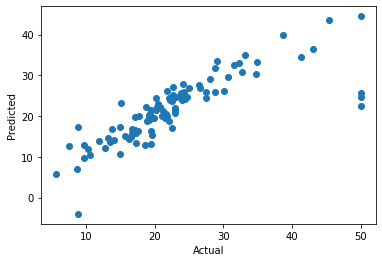

In [14]:
X_train3=PolynomialFeatures(j).fit_transform(X_train)
X_test3=PolynomialFeatures(j).fit_transform(X_test)
X_val3=PolynomialFeatures(j).fit_transform(X_val)
model=LinearRegression()
model.fit(X_train3,y_train)
predicted=model.predict(X_test3)
plt.scatter(y_test,predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')